<a href="https://colab.research.google.com/github/MatheuxGualter/TelecomX_Parte2/blob/main/TelecomX_BR_PT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extração

In [29]:
import pandas as pd

df_churn = pd.read_csv('dados_tratados.csv')

print('Primeiras 5 linhas do DataFrame:')
print(df_churn.head())
print('\nInformações do DataFrame:')
print(df_churn.info())

Primeiras 5 linhas do DataFrame:
   ID_Cliente  Evasao  Genero  Cidadao_Senior  Parceiro  Dependentes  \
0  0002-ORFBO       0       1               0         1            1   
1  0003-MKNFE       0       0               0         0            0   
2  0004-TLHLJ       1       0               0         0            0   
3  0011-IGKFF       1       0               1         1            0   
4  0013-EXCHZ       1       1               1         1            0   

   Meses_Contrato  Servico_Telefone  Multiplas_Linhas Servico_Internet  ...  \
0               9                 1                 0              DSL  ...   
1               9                 1                 1              DSL  ...   
2               4                 1                 0      Fiber optic  ...   
3              13                 1                 0      Fiber optic  ...   
4               3                 1                 0      Fiber optic  ...   

   Suporte_Tecnico  Streaming_TV  Streaming_Filmes   Tipo_C

#🛠️ Preparação dos Dados

In [30]:
# Importando as bibliotecas necessárias
import pandas as pd

# 1. Carregando o arquivo CSV
df_churn = pd.read_csv('dados_tratados.csv')

# 2. Remoção de Colunas Irrelevantes
# A coluna 'ID_Cliente' é um identificador único e 'Evasao_Label' é a mesma informação de 'Evasao'.
df_churn = df_churn.drop(['ID_Cliente', 'Evasao_Label'], axis=1)

# 3. Transformação de Variáveis Categóricas
# Identificando as colunas categóricas para aplicar One-Hot Encoding
colunas_categoricas = ['Servico_Internet', 'Tipo_Contrato', 'Metodo_Pagamento']
df_churn_encoded = pd.get_dummies(df_churn, columns=colunas_categoricas, drop_first=True)

# 4. Avaliação de Desequilíbrio de Classes
print('Proporção de clientes que evadiram:')
proporcao_evasao = df_churn_encoded['Evasao'].value_counts(normalize=True) * 100
print(proporcao_evasao)

# 5. Separação de Dados (X e y)
X = df_churn_encoded.drop('Evasao', axis=1) # Variáveis preditoras (features)
y = df_churn_encoded['Evasao'] # Variável alvo (target)

# Exibindo as primeiras linhas do DataFrame pré-processado e os shapes de X e y
print('\nPrimeiras 5 linhas do DataFrame pré-processado:')
print(X.head())

print(f'\nShape das variáveis preditoras (X): {X.shape}')
print(f'Shape da variável alvo (y): {y.shape}')

# Salvando o dataframe pré-processado em um novo arquivo CSV para futuras etapas
df_churn_encoded.to_csv('dados_preparados_para_modelagem.csv', index=False)

Proporção de clientes que evadiram:
Evasao
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Primeiras 5 linhas do DataFrame pré-processado:
   Genero  Cidadao_Senior  Parceiro  Dependentes  Meses_Contrato  \
0       1               0         1            1               9   
1       0               0         0            0               9   
2       0               0         0            0               4   
3       0               1         1            0              13   
4       1               1         1            0               3   

   Servico_Telefone  Multiplas_Linhas  Seguranca_Online  Backup_Online  \
0                 1                 0                 0              1   
1                 1                 1                 0              0   
2                 1                 0                 0              0   
3                 1                 0                 0              1   
4                 1                 0                 0           

#🎯 Correlação e Seleção de Variáveis

Calculando a matriz de correlação...
Gráfico da matriz de correlação salvo como "matriz_correlacao.png".
Gráfico de boxplot de Meses de Contrato vs. Evasão salvo como "boxplot_meses_contrato.png".
Gráfico de boxplot de Cobranças Totais vs. Evasão salvo como "boxplot_cobrancas_totais.png".

Correlação das variáveis com a Evasão:
Evasao                                      1.000000
Servico_Internet_Fiber optic                0.307463
Metodo_Pagamento_Electronic check           0.301455
Cobrancas_Diarias                           0.192858
Cobrancas_Mensais                           0.192858
Fatura_Online                               0.191454
Cidadao_Senior                              0.150541
Streaming_TV                                0.063254
Streaming_Filmes                            0.060860
Multiplas_Linhas                            0.040033
Servico_Telefone                            0.011691
Genero                                      0.008545
Protecao_Dispositivo              

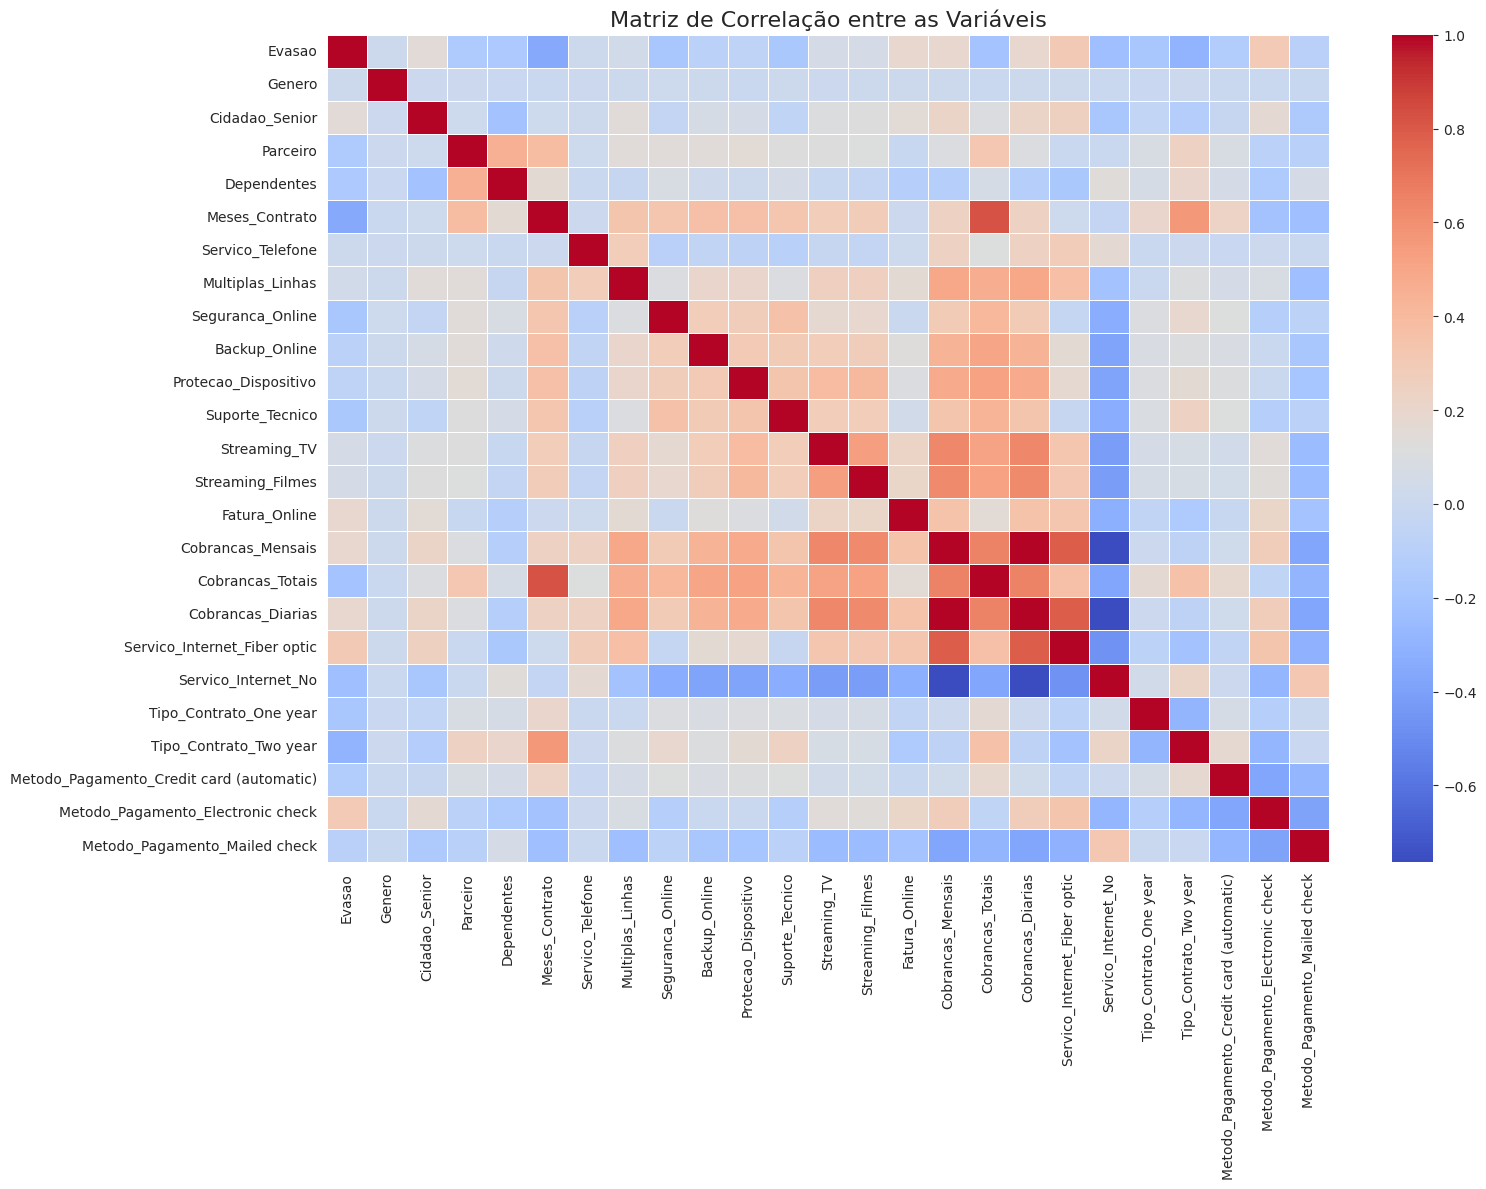

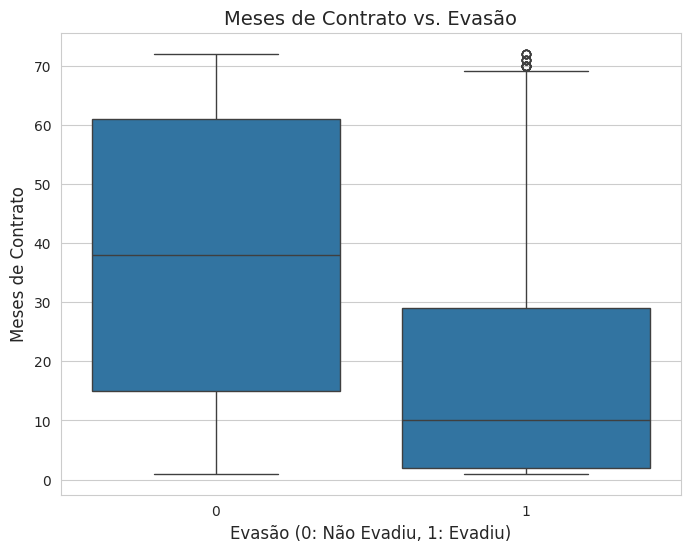

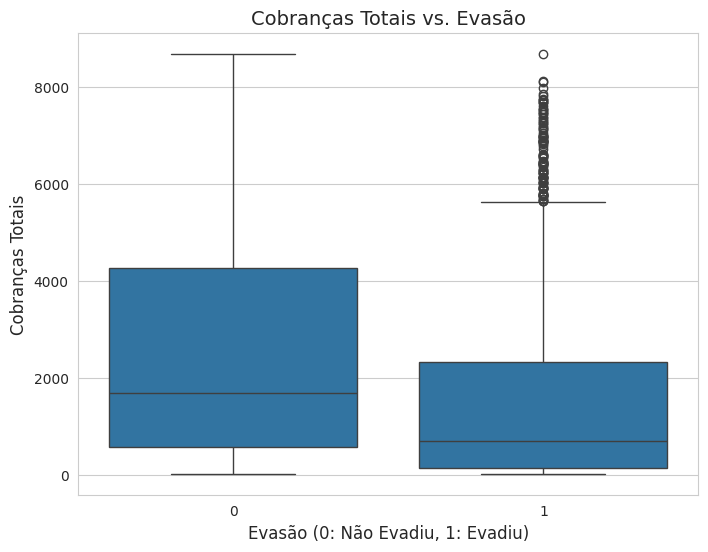

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com os dados pré-processados
df_preparado = pd.read_csv('dados_preparados_para_modelagem.csv')

# Análise de Correlação
print('Calculando a matriz de correlação...')
# Excluir colunas com valor único para evitar erros na correlação
df_corr = df_preparado.loc[:, (df_preparado != df_preparado.iloc[0]).any()]

# Calcular a matriz de correlação
matriz_correlacao = df_corr.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_correlacao, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=16)
plt.tight_layout()
plt.savefig('matriz_correlacao.png')
print('Gráfico da matriz de correlação salvo como "matriz_correlacao.png".')

# Análises Direcionadas

# Plotar boxplot para a relação entre 'Meses_Contrato' e 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_preparado)
plt.title('Meses de Contrato vs. Evasão', fontsize=14)
plt.xlabel('Evasão (0: Não Evadiu, 1: Evadiu)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.savefig('boxplot_meses_contrato.png')
print('Gráfico de boxplot de Meses de Contrato vs. Evasão salvo como "boxplot_meses_contrato.png".')

# Plotar boxplot para a relação entre 'Cobrancas_Totais' e 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Cobrancas_Totais', data=df_preparado)
plt.title('Cobranças Totais vs. Evasão', fontsize=14)
plt.xlabel('Evasão (0: Não Evadiu, 1: Evadiu)', fontsize=12)
plt.ylabel('Cobranças Totais', fontsize=12)
plt.savefig('boxplot_cobrancas_totais.png')
print('Gráfico de boxplot de Cobranças Totais vs. Evasão salvo como "boxplot_cobrancas_totais.png".')

# Exibindo as correlações com a variável 'Evasao' para análise mais detalhada
correlacao_evasao = matriz_correlacao['Evasao'].sort_values(ascending=False)
print('\nCorrelação das variáveis com a Evasão:')
print(correlacao_evasao)

#🤖 Modelagem Preditiva

Shape do conjunto de treino: X=(5625, 24), y=(5625,)
Shape do conjunto de teste: X=(1407, 24), y=(1407,)

--- Treinando o modelo de Regressão Logística ---

--- Treinando o modelo de Random Forest ---

=== Avaliação do Modelo de Regressão Logística ===
Acurácia: 0.8010

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



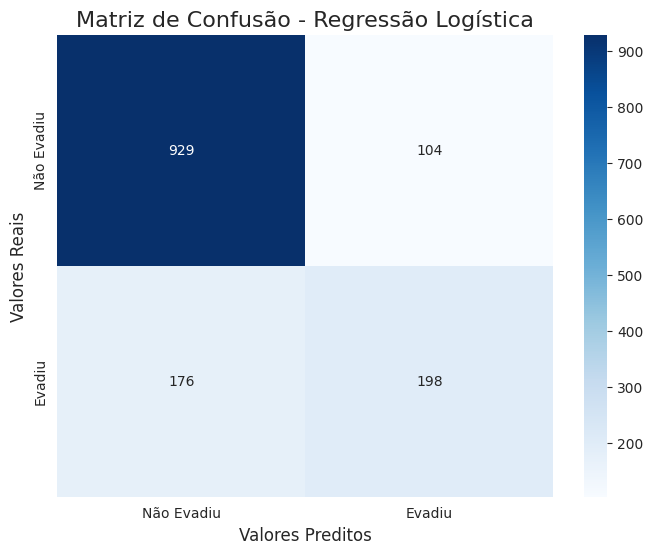


=== Avaliação do Modelo de Random Forest ===
Acurácia: 0.7797

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



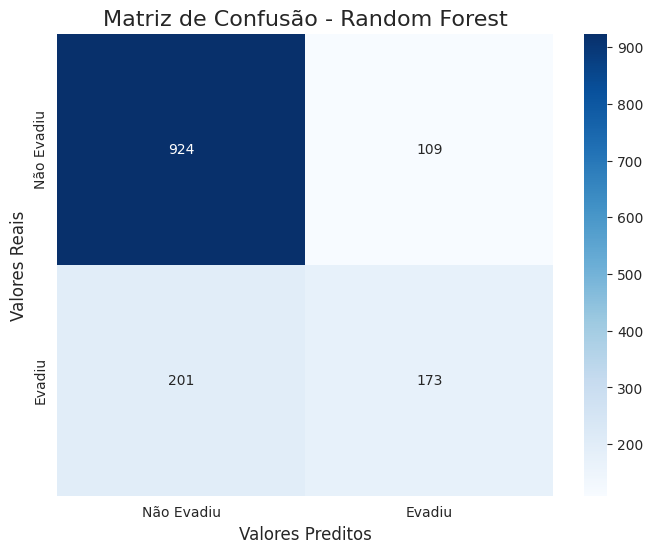

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar os dados pré-processados
df = pd.read_csv('dados_preparados_para_modelagem.csv')

# Separar as features (X) e a variável alvo (y)
X = df.drop('Evasao', axis=1)
y = df['Evasao']

# 2. Divisão dos Dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape do conjunto de treino: X={X_train.shape}, y={y_train.shape}")
print(f"Shape do conjunto de teste: X={X_test.shape}, y={y_test.shape}")

# 3. Criação de Modelos

# Modelo 1: Regressão Logística com Normalização (Pipeline)
print("\n--- Treinando o modelo de Regressão Logística ---")
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Modelo 2: Random Forest (sem necessidade de normalização)
print("\n--- Treinando o modelo de Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 4. Avaliação dos Modelos

# Avaliação da Regressão Logística
print("\n=== Avaliação do Modelo de Regressão Logística ===")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# Matriz de Confusão para Regressão Logística
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.ylabel('Valores Reais', fontsize=12)
plt.xlabel('Valores Preditos', fontsize=12)
plt.show()

# Avaliação do Random Forest
print("\n=== Avaliação do Modelo de Random Forest ===")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.ylabel('Valores Reais', fontsize=12)
plt.xlabel('Valores Preditos', fontsize=12)
plt.show()

#📋 Interpretação e Conclusões

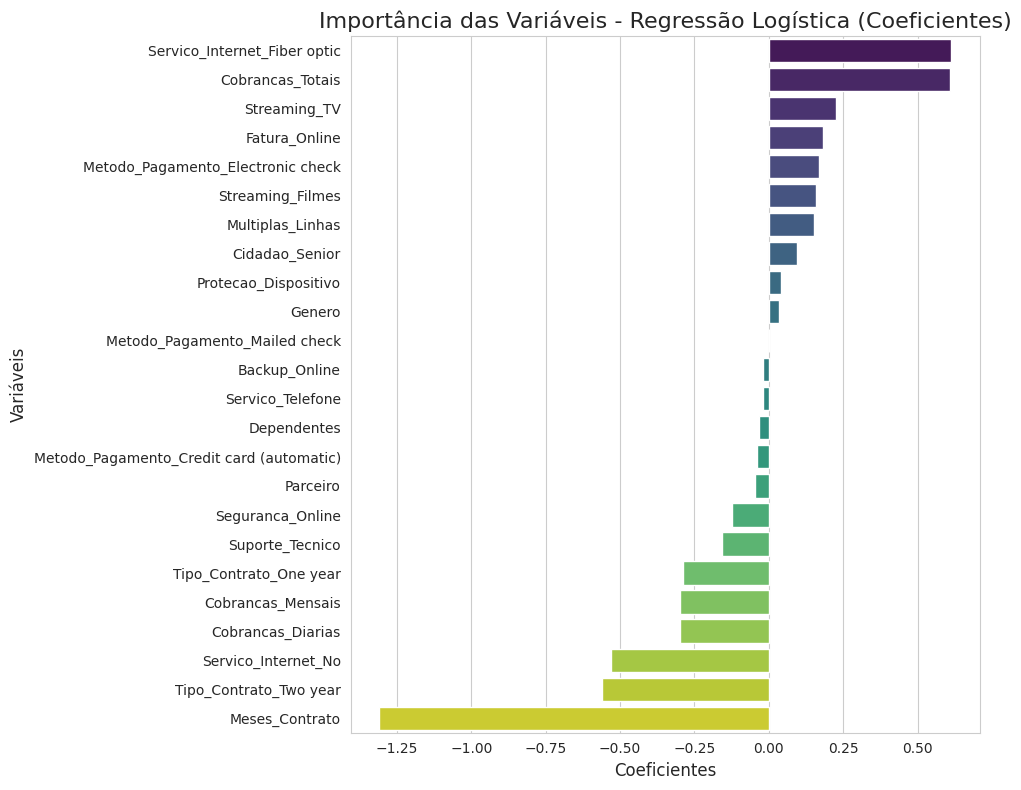

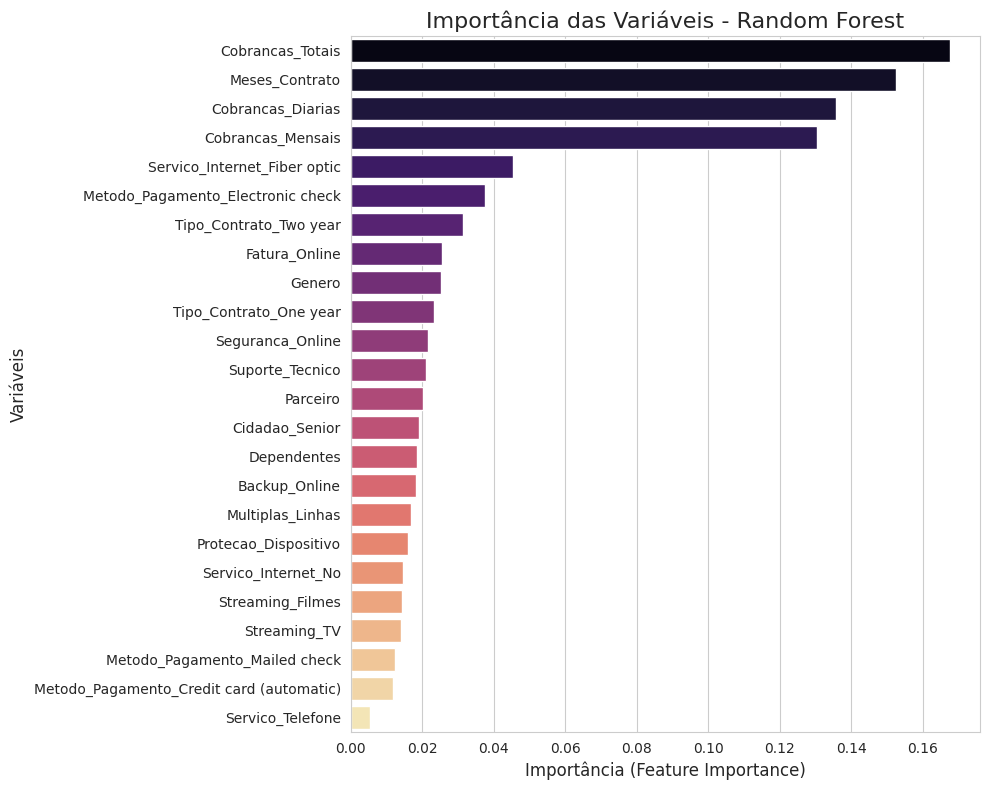

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar os dados pré-processados
df = pd.read_csv('dados_preparados_para_modelagem.csv')

# Separar as features (X) e a variável alvo (y)
X = df.drop('Evasao', axis=1)
y = df['Evasao']

# 2. Divisão dos Dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Criação de Modelos
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])
pipeline_lr.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Análise de Importância das Variáveis
coeficientes_lr = pipeline_lr.named_steps['classifier'].coef_[0]
features = X.columns
importancia_lr = pd.Series(coeficientes_lr, index=features).sort_values(ascending=False)
importancia_rf = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Visualização da Importância das Variáveis (Regressão Logística)
plt.figure(figsize=(10, 8))
sns.barplot(x=importancia_lr.values, y=importancia_lr.index, hue=importancia_lr.index, palette='viridis', legend=False)
plt.title('Importância das Variáveis - Regressão Logística (Coeficientes)', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()

# Visualização da Importância das Variáveis (Random Forest)
plt.figure(figsize=(10, 8))
sns.barplot(x=importancia_rf.values, y=importancia_rf.index, hue=importancia_rf.index, palette='magma', legend=False)
plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.xlabel('Importância (Feature Importance)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()

#📄Relatório Final

### **Conclusões do Desafio: Análise da Evasão de Clientes (Churn) na Telecom X**

#### **Análise de Importância das Variáveis**

A análise dos modelos de Regressão Logística e Random Forest revelou insights consistentes sobre os principais fatores que levam à evasão de clientes.

**1. Fatores Relacionados ao Tempo e Gasto (Evasão)**

  * **Meses de Contrato (`Meses_Contrato`)**: Esta é a variável mais importante na previsão de evasão. Clientes que estão com a empresa por menos tempo têm uma probabilidade significativamente maior de sair.
  * **Cobranças Totais (`Cobrancas_Totais`)**: Juntamente com o tempo de contrato, o valor total gasto pelo cliente também é um fator crucial. Clientes que evadem tendem a ter um gasto acumulado muito menor, o que reforça a ideia de que a evasão ocorre no início da jornada do cliente.

**2. Fatores de Serviço e Pagamento (Evasão)**

  * **Serviço de Internet (`Servico_Internet_Fiber optic`)**: A contratação do serviço de fibra óptica é a variável com a maior correlação positiva com a evasão. Isso sugere um possível problema de qualidade ou experiência do cliente com este tipo de serviço.
  * **Método de Pagamento (`Metodo_Pagamento_Electronic check`)**: O uso de pagamentos eletrônicos também demonstrou ter uma correlação positiva com a evasão, indicando que clientes que utilizam este método podem estar mais propensos a cancelar.

**3. Fatores de Retenção**

  * **Tipo de Contrato (`Tipo_Contrato_Two year`)**: Ter um contrato de dois anos é a variável com maior correlação negativa com a evasão, mostrando que clientes com contratos mais longos são muito mais propensos a permanecerem na empresa.
  * **Serviços Adicionais (`Seguranca_Online`, `Suporte_Tecnico`)**: Clientes que optam por serviços de segurança e suporte técnico tendem a ter menor probabilidade de evasão.

#### **Recomendações Estratégicas para a Telecom X**

Com base nas conclusões da análise, a Telecom X pode adotar as seguintes estratégias para reduzir a taxa de evasão:

1.  **Focar na Experiência de Novos Clientes**: O principal momento de risco de evasão é nos primeiros meses. A empresa deve investir em um processo de onboarding robusto e proativo, com acompanhamento personalizado e garantia de que o cliente está satisfeito.

2.  **Incentivar Contratos de Longo Prazo**: Oferecer benefícios exclusivos para contratos de dois anos, como descontos, serviços adicionais gratuitos ou upgrades, pode ser uma forma eficaz de reter clientes e aumentar o valor total de vida do cliente (LTV).

3.  **Avaliar a Qualidade do Serviço de Fibra Óptica**: A alta correlação entre fibra óptica e evasão é um sinal de alerta. A Telecom X deve realizar pesquisas de satisfação e investigar as reclamações de clientes que utilizam este serviço para identificar e solucionar problemas operacionais.

4.  **Otimizar a Experiência do Pagamento Eletrônico**: A empresa pode investigar por que clientes que pagam eletronicamente têm maior propensão a evadir. A experiência de uso do aplicativo, clareza nas cobranças ou segurança da transação podem ser pontos a serem melhorados.

Esta análise fornece uma base sólida para a implementação de ações estratégicas focadas em reter os clientes mais valiosos e mitigar os principais fatores de risco.